In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ads_dimension = pd.read_excel("Dataset.xlsx",sheet_name='ads dimension (dim table)',header=1)
mod_dim = pd.read_excel("Dataset.xlsx",sheet_name='moderator dimension (dim table)',header=0)

#test


### Check Data of Ads Dimension


In [105]:
print(ads_dimension.shape)


(40679, 12)


# Ads Dimension


### Cleaning Punish_Num Column

In [106]:
# to find the distribution of latest_punish_begin_date for blank punish_num rows
condition = ads_dimension['punish_num'].isna()
filtered_df = ads_dimension[condition]
filtered_df.head()

unique_countss = filtered_df['latest_punish_begin_date'].value_counts()
print(unique_countss)

# all latest_punish_begin_date = 2000-01-01 if punish_num is blank, so we replace the blank with a 0
ads_dimension['punish_num'].fillna(0, inplace=True)
unique_counts = ads_dimension['punish_num'].value_counts()
print(unique_counts)

2000-01-01    38286
Name: latest_punish_begin_date, dtype: int64
0.0     38286
1.0      2194
2.0       163
4.0        14
3.0        13
16.0        5
12.0        2
5.0         2
Name: punish_num, dtype: int64


In [107]:
## Since the distribution of punish_num is skewed and have many zero values, we change punish num into a categorical variable, with "Low" representing a punish_num of 0, "Medium" representing a punish_num of 1 to 5 and "High" representing a punish num of 12 or 16
def categorize_punish_num(value):
    if value in [0]:
        return "Low"
    elif value in [1,2, 3, 4, 5]:
        return "Medium"
    elif value in [12, 16]:
        return "High"
    else:
        return None  # Handle other values if needed

ads_dimension['punish_category'] = ads_dimension['punish_num'].apply(categorize_punish_num)

unique_counts = ads_dimension['punish_category'].value_counts()
print(unique_counts)
ads_dimension = ads_dimension.drop('punish_num', axis=1)
ads_dimension.head()

Low       38286
Medium     2386
High          7
Name: punish_category, dtype: int64


,p_date,ad_id,delivery_country,queue_market,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,punish_category
0,20230807,1747578422390810,US,USCA,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation,Medium
1,20230807,1758543228094480,SA,MENA,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged),Medium
2,20230807,1738303151826990,AU,AU,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation,Medium
3,20230807,1738303920938010,NZ,NZ,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation,Medium
4,20230807,1738304016410620,NZ,NZ,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation,Medium


### Removing Duplicate Rows

In [108]:

# deleted all rows that are an exact duplicate(all columns same) of other rows.
len(ads_dimension)

duplicates = ads_dimension.duplicated()
# duplicates = ads_dimension.duplicated().sum()
duplicate_rows = ads_dimension[duplicates]
duplicate_rows


,p_date,ad_id,delivery_country,queue_market,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,punish_category
119,20230807,1767389794976760,ID,ID,2023-05-10,7.7968,10.8649,2023-05-31 06:12:00,1.80,Auction Ads,auction_relation,Medium
141,20230807,1770618315063340,CA,USCA,2023-06-29,55.3400,51.0029,2023-07-05 22:41:00,1.78,Auction Ads,auction_relation,Medium
147,20230807,1770774645761070,US,USCA,2023-06-29,0.3800,51.0029,2023-07-07 16:04:00,1.78,Auction Ads,auction_relation,Medium
174,20230807,1770837186637870,ID,ID,2023-05-16,12.8547,8.2306,2023-07-08 07:35:00,1.80,Auction Ads,auction_relation,Medium
178,20230807,1771829420441650,MY,MY,2023-08-03,25.1724,18.4393,2023-07-19 06:29:00,2.31,Auction Ads,auction_relation,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
40324,20230807,1773576487869440,TR,NaN,2000-01-01,NaN,0.1207,NaT,0.54,Non-Auction Ads,Promote,Low
40377,20230807,1773566740854850,TR,NaN,2000-01-01,NaN,0.1032,NaT,0.54,Non-Auction Ads,Promote,Low
40624,20230807,1773596777307170,HU,NaN,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote,Low
40626,20230807,1773601756737540,PL,NaN,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote,Low


##### We have realised that there are quite a significant number of rows which are duplicated (all columns have the same data), and thus we proceed to remove these rows. 


In [109]:
ads_dimension_no_duplicates = ads_dimension.drop_duplicates()
print(ads_dimension_no_duplicates)
len(ads_dimension_no_duplicates)

# ads_dimension_no_duplicates.to_excel('no_dups_df.xlsx', index=False)

# rename 
ads_dim2 = ads_dimension_no_duplicates
ads_dim2.head()


         p_date             ad_id delivery_country queue_market  \
0      20230807  1747578422390810               US         USCA   
1      20230807  1758543228094480               SA         MENA   
2      20230807  1738303151826990               AU           AU   
3      20230807  1738303920938010               NZ           NZ   
4      20230807  1738304016410620               NZ           NZ   
...         ...               ...              ...          ...   
40673  20230807  1773517805189120               TR          NaN   
40674  20230807  1773472206047230               VN          NaN   
40675  20230807  1773607712030720               BR          NaN   
40676  20230807  1773589699308540               BE          NaN   
40678  20230807  1773608138524670               BR          NaN   

      latest_punish_begin_date  ad_revenue  avg_ad_revenue  \
0                   2023-07-24   5132.1700        4795.250   
1                   2023-06-14   1976.2500        1063.767   
2        

,p_date,ad_id,delivery_country,queue_market,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,punish_category
0,20230807,1747578422390810,US,USCA,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation,Medium
1,20230807,1758543228094480,SA,MENA,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged),Medium
2,20230807,1738303151826990,AU,AU,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation,Medium
3,20230807,1738303920938010,NZ,NZ,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation,Medium
4,20230807,1738304016410620,NZ,NZ,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation,Medium


### Check for Null/Missing Values in Columns 

In [110]:
ads_dim2.head()
# finding the number of null/blank values for all columns in ads_dimension
for col in ads_dim2.columns:
    if ads_dim2[col].isna().sum() > 0:
        print(f' "{col}" : {ads_dim2[col].isna().sum()}')
    else:
        continue


 "queue_market" : 20959
 "ad_revenue" : 10495
 "start_time" : 6600


### Removing Queue Market Column


In [111]:
ads_dim2 = ads_dim2.drop('queue_market', axis=1)
ads_dim2.head()

,p_date,ad_id,delivery_country,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,punish_category
0,20230807,1747578422390810,US,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation,Medium
1,20230807,1758543228094480,SA,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged),Medium
2,20230807,1738303151826990,AU,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation,Medium
3,20230807,1738303920938010,NZ,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation,Medium
4,20230807,1738304016410620,NZ,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation,Medium


In [112]:
# Drop redundant cols
ads_dim2 = ads_dim2.drop('p_date', axis=1)

ads_dim2.head()

,ad_id,delivery_country,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,punish_category
0,1747578422390810,US,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation,Medium
1,1758543228094480,SA,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged),Medium
2,1738303151826990,AU,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation,Medium
3,1738303920938010,NZ,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation,Medium
4,1738304016410620,NZ,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation,Medium


### Convert 'latest_punish_begin_date' to continuous variable 'days_since_punish'

In [113]:
ads_dim2['latest_punish_begin_date'] = pd.to_datetime(ads_dim2['latest_punish_begin_date'])

latest_date = ads_dim2['latest_punish_begin_date'].max()
print(latest_date)

earliest_date = ads_dim2[ads_dim2['latest_punish_begin_date'] != '2000-01-01 00:00:00']['latest_punish_begin_date'].min()
print(earliest_date)

reference_date = pd.to_datetime('2023-08-07 00:00:00')

ads_dim2['days_since_punish'] = (reference_date - ads_dim2['latest_punish_begin_date']).dt.days

ads_dim2.loc[ads_dim2['latest_punish_begin_date'] == '2000-01-01', 'days_since_punish'] = 90

print(ads_dim2['days_since_punish'])
ads_dim2 = ads_dim2.drop('latest_punish_begin_date', axis=1)
ads_dim2.head()

2023-08-07 00:00:00
2023-05-10 00:00:00
0        14
1        54
2        14
3        14
4        14
         ..
40673    90
40674    90
40675    90
40676    90
40678    90
Name: days_since_punish, Length: 39564, dtype: int64


,ad_id,delivery_country,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,punish_category,days_since_punish
0,1747578422390810,US,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation,Medium,14
1,1758543228094480,SA,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged),Medium,54
2,1738303151826990,AU,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation,Medium,14
3,1738303920938010,NZ,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation,Medium,14
4,1738304016410620,NZ,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation,Medium,14


### Convert 'start_time' to continuous variable 'ad_run_time' in days

In [114]:
ads_dim2['start_time'] = pd.to_datetime(ads_dim2['start_time'])

latest_date_start_time = ads_dim2['start_time'].max()
print(latest_date_start_time)

earliest_date_start_time = ads_dim2['start_time'].min()
print(earliest_date_start_time)

ads_dim3 = ads_dim2[ads_dim2['start_time'] < '2023-08-08'].copy()

print(len(ads_dim3)/len(ads_dim2) * 100)

cutoff = pd.to_datetime("2023-08-08 00:00:00")
ads_dim3['ad_run_time'] = (cutoff - ads_dim3['start_time']).dt.total_seconds()/86400

print(ads_dim3['ad_run_time'])

ads_dim3 = ads_dim3.drop('start_time', axis=1)

ads_dim3.head()

2023-09-13 07:00:00
2021-04-23 10:39:00
81.77383479931251
0        287.391667
1        166.340278
2        389.791667
3        389.780556
4        389.779861
            ...    
33685      0.000694
33686      0.000694
33691      0.000694
33692      0.000694
33694      0.000694
Name: ad_run_time, Length: 32353, dtype: float64


,ad_id,delivery_country,ad_revenue,avg_ad_revenue,baseline_st,product_line,task_type_en,punish_category,days_since_punish,ad_run_time
0,1747578422390810,US,5132.1700,4795.250,1.78,Auction Ads,auction_relation,Medium,14,287.391667
1,1758543228094480,SA,1976.2500,1063.767,1.67,RIE,Ad Group Recall (Merged),Medium,54,166.340278
2,1738303151826990,AU,1.7355,5.365,1.84,Auction Ads,auction_relation,Medium,14,389.791667
3,1738303920938010,NZ,NaN,5.365,1.58,Auction Ads,auction_relation,Medium,14,389.780556
4,1738304016410620,NZ,1.5250,5.365,1.58,Auction Ads,auction_relation,Medium,14,389.779861


### Combine 'ad_revenue' and 'ad_run_time' into "ad_rev_per_day"

In [115]:
# Create ad_rev_per_day variable from 'ad_revenue' and 'ad_run_time'
ads_dim3['ad_rev_per_day'] = ads_dim3['ad_revenue'] / ads_dim3['ad_run_time']

print(ads_dim3['ad_rev_per_day'])

ads_dim3 = ads_dim3.drop('ad_revenue', axis=1)
ads_dim3 = ads_dim3.drop('ad_run_time', axis=1)

ads_dim3.head()


0        17.857755
1        11.880767
2         0.004452
3              NaN
4         0.003912
           ...    
33685          NaN
33686          NaN
33691          NaN
33692          NaN
33694          NaN
Name: ad_rev_per_day, Length: 32353, dtype: float64


,ad_id,delivery_country,avg_ad_revenue,baseline_st,product_line,task_type_en,punish_category,days_since_punish,ad_rev_per_day
0,1747578422390810,US,4795.250,1.78,Auction Ads,auction_relation,Medium,14,17.857755
1,1758543228094480,SA,1063.767,1.67,RIE,Ad Group Recall (Merged),Medium,54,11.880767
2,1738303151826990,AU,5.365,1.84,Auction Ads,auction_relation,Medium,14,0.004452
3,1738303920938010,NZ,5.365,1.58,Auction Ads,auction_relation,Medium,14,NaN
4,1738304016410620,NZ,5.365,1.58,Auction Ads,auction_relation,Medium,14,0.003912


### Check for any null values remaining

In [116]:

for col in ads_dim3.columns:
    if ads_dim3[col].isna().sum() > 0:
        print(f' "{col}" : {ads_dim3[col].isna().sum()}')
    else:
        continue

null_rows = ads_dim3[ads_dim3[['ad_rev_per_day']].isnull().all(axis=1)]


 "ad_rev_per_day" : 3324


## Data Exploration

In [117]:
ads_dim3.describe()

,ad_id,avg_ad_revenue,baseline_st,days_since_punish,ad_rev_per_day
count,3.235300e+04,32353.000000,32353.000000,32353.000000,29029.000000
mean,1.772870e+15,24.324652,1.320120,85.580070,25.135133
std,2.800203e+12,161.270213,0.640921,18.139581,157.903478
min,1.697828e+15,0.000000,0.540000,0.000000,0.000000
25%,1.773327e+15,1.206100,0.540000,90.000000,0.892305
50%,1.773514e+15,3.333300,1.530000,90.000000,3.944321
75%,1.773559e+15,9.920000,1.780000,90.000000,13.966249
max,1.773617e+15,17144.498600,7.590000,90.000000,10777.452632


In [118]:
ads_dim3["avg_ad_revenue"].value_counts()

0.0000      439
491.9031    141
4.5096      117
4.4564      101
10.1506      85
           ... 
5.3464        1
0.4975        1
16.8047       1
9.6398        1
1.6495        1
Name: avg_ad_revenue, Length: 16694, dtype: int64

#### For the different columns, we can see that the variables have different value ranges and magnitiudes. The max values have a great disparity and the std are also different for the different variables. Let us first look at the distribution of the variables 

### Numerical Variables 

#### Histogram

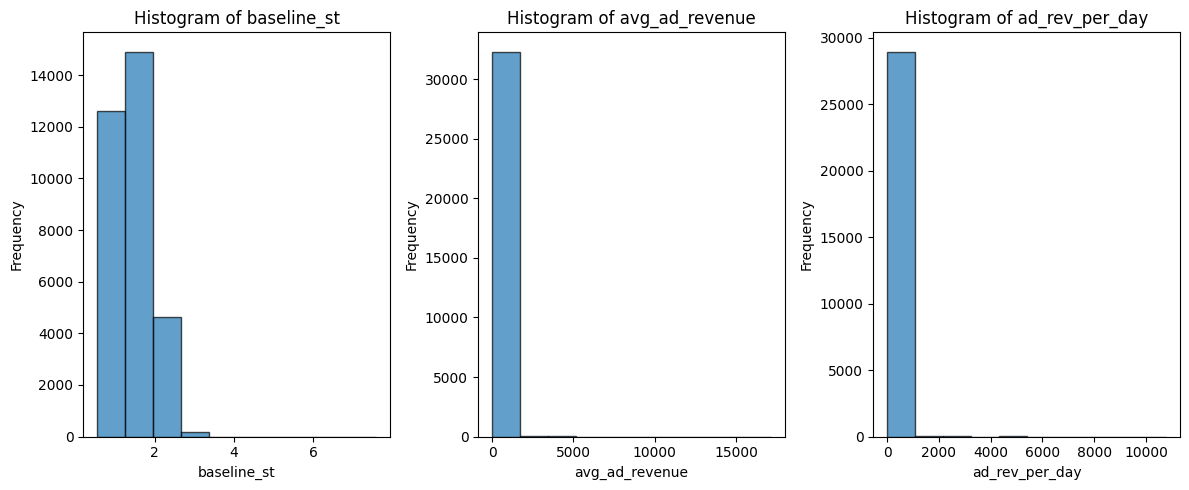

In [119]:
plt.figure(figsize=(12, 5))
numerical_columns = [ 'baseline_st' , 'avg_ad_revenue', 'ad_rev_per_day']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(ads_dim3[column_name], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### From the above histograms, we can see that the variables are not normally distributed. The data seems extremely skewed as well. 

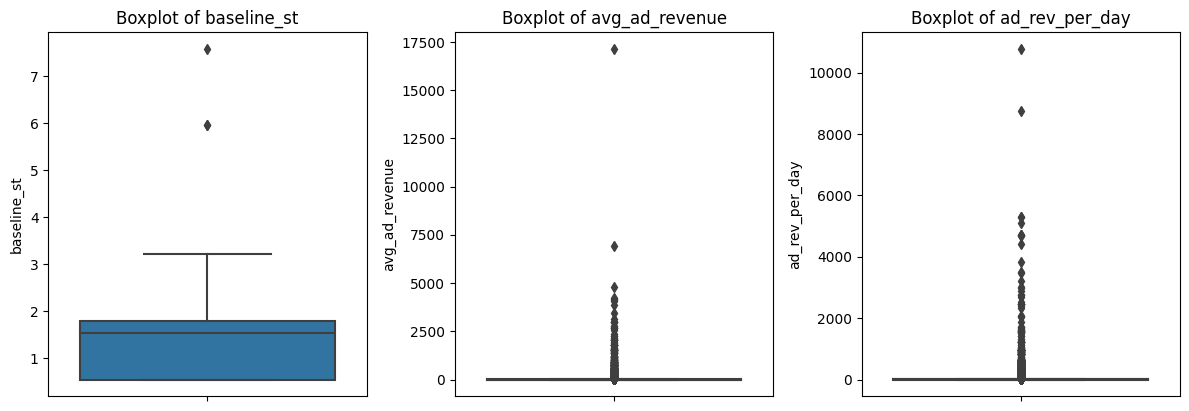

In [120]:
# Select numerical columns for outlier analysis
numerical_columns = [ 'baseline_st' , 'avg_ad_revenue', 'ad_rev_per_day']
# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=ads_dim3, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### Find the number of outliers per numerical column

In [121]:
baseline_st_outliers = ads_dim3[ads_dim3['baseline_st'] > 5]

print("The number of outliers for baseline_st = ", len(baseline_st_outliers))

The number of outliers for baseline_st =  3


In [122]:
ad_rev_per_day_outliers = ads_dim3[ads_dim3['ad_rev_per_day'] > 8000]

print("The number of outliers for ad_rev_per_day = ", len(ad_rev_per_day_outliers))
print(ad_rev_per_day_outliers["ad_rev_per_day"])

avg_ad_revenue_outliers = ads_dim3[ads_dim3['avg_ad_revenue'] > 10000]

print("The number of outliers for avg_ad_revenue = ", len(avg_ad_revenue_outliers))
print(avg_ad_revenue_outliers["avg_ad_revenue"])

The number of outliers for ad_rev_per_day =  2
15772    10777.452632
17102     8746.783812
Name: ad_rev_per_day, dtype: float64
The number of outliers for avg_ad_revenue =  1
155    17144.4986
Name: avg_ad_revenue, dtype: float64


#### From the above outlier analysis, we can see that these variables all have outliers. As these variables have different max and std values, scaling is required. Since outliers are present and that these variables are in a non -normal distribution suggests that robust scaling should be conducted on the data. We use robust scaling as we want to bring the data into a consistent scale while minimizing the impact of extreme values. This technique would also be helpful for machine learning models that would be utilised later on. 


## Robust Scaling

In [123]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 

In [124]:
variables = ["ad_rev_per_day", "avg_ad_revenue", "baseline_st"]

## create new dataframe 
ads_dim_scaled = ads_dim3.copy()
subset = ads_dim3[variables]


# fit and transform variables 
scaled_data = scaler.fit_transform(subset)
ads_dim_scaled[variables] = scaled_data

In [125]:
ads_dim_scaled.describe()

,ad_id,avg_ad_revenue,baseline_st,days_since_punish,ad_rev_per_day
count,3.235300e+04,32353.000000,32353.000000,32353.000000,29029.000000
mean,1.772870e+15,2.408950,-0.169258,85.580070,1.620843
std,2.800203e+12,18.507237,0.516872,18.139581,12.077723
min,1.697828e+15,-0.382527,-0.798387,0.000000,-0.301693
25%,1.773327e+15,-0.244116,-0.798387,90.000000,-0.233443
50%,1.773514e+15,0.000000,0.000000,90.000000,0.000000
75%,1.773559e+15,0.755884,0.201613,90.000000,0.766557
max,1.773617e+15,1967.106037,4.887097,90.000000,824.044251


### However we realise that some values like the ad_revenue goes below 0, which does not make logical sense. Thus, we apply the shift and scale method to the columns having negative values in the dataset to preserve the order and distribution and logical sense. 

In [126]:
columns = ["ad_rev_per_day", "avg_ad_revenue", "baseline_st"]

for column in columns:
    ads_dim_scaled[column] += abs(ads_dim_scaled[column].min())

ads_dim_scaled.describe()

,ad_id,avg_ad_revenue,baseline_st,days_since_punish,ad_rev_per_day
count,3.235300e+04,32353.000000,32353.000000,32353.000000,29029.000000
mean,1.772870e+15,2.791477,0.629129,85.580070,1.922536
std,2.800203e+12,18.507237,0.516872,18.139581,12.077723
min,1.697828e+15,0.000000,0.000000,0.000000,0.000000
25%,1.773327e+15,0.138411,0.000000,90.000000,0.068251
50%,1.773514e+15,0.382527,0.798387,90.000000,0.301693
75%,1.773559e+15,1.138411,1.000000,90.000000,1.068251
max,1.773617e+15,1967.488564,5.685484,90.000000,824.345945


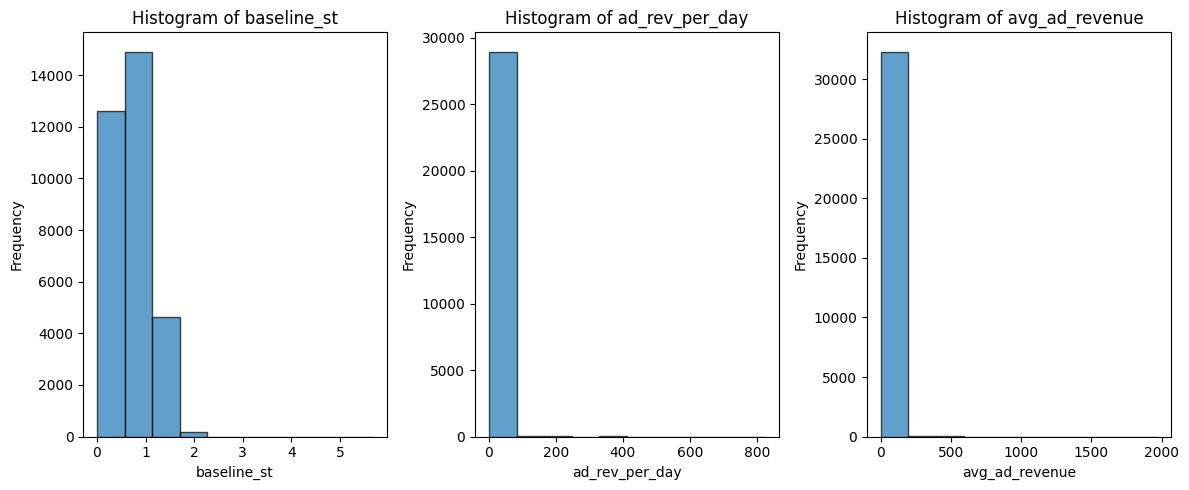

In [127]:
plt.figure(figsize=(12, 5))
numerical_columns = ['baseline_st' ,'ad_rev_per_day', 'avg_ad_revenue']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(ads_dim_scaled[column_name], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

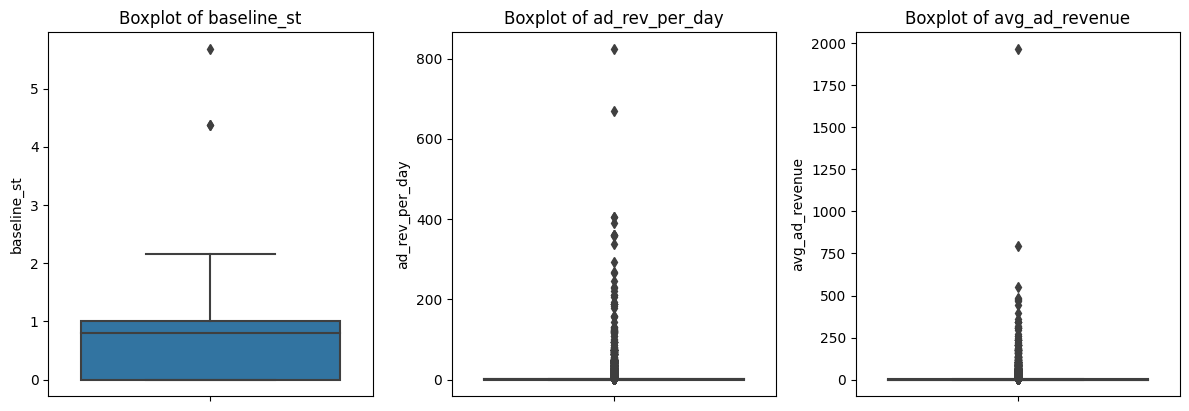

In [128]:
# Select numerical columns for outlier analysis
numerical_columns = ['baseline_st' ,'ad_rev_per_day', 'avg_ad_revenue']
# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=ads_dim_scaled, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### Filling in missing values using KNN

In [129]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

knn_ads_dim = ads_dim_scaled.copy()
knn_ads_dim = knn_ads_dim.drop('ad_id', axis=1)

knn_ads_dim.head()
knn_ads_dim['ad_rev_per_day'] = imputer.fit_transform(ads_dim_scaled[['ad_rev_per_day']])
knn_ads_dim['ad_rev_per_day']

0        1.365904
1        0.908736
2        0.000341
3        1.922536
4        0.000299
           ...   
33685    1.922536
33686    1.922536
33691    1.922536
33692    1.922536
33694    1.922536
Name: ad_rev_per_day, Length: 32353, dtype: float64

In [130]:
ads_dim_scaled["ad_rev_per_day"] = knn_ads_dim["ad_rev_per_day"]
ads_dim_scaled.head()

,ad_id,delivery_country,avg_ad_revenue,baseline_st,product_line,task_type_en,punish_category,days_since_punish,ad_rev_per_day
0,1747578422390810,US,550.298948,1.000000,Auction Ads,auction_relation,Medium,14,1.365904
1,1758543228094480,SA,122.077026,0.911290,RIE,Ad Group Recall (Merged),Medium,54,0.908736
2,1738303151826990,AU,0.615683,1.048387,Auction Ads,auction_relation,Medium,14,0.000341
3,1738303920938010,NZ,0.615683,0.838710,Auction Ads,auction_relation,Medium,14,1.922536
4,1738304016410620,NZ,0.615683,0.838710,Auction Ads,auction_relation,Medium,14,0.000299


## Log Transform 

6.714602408283121 -4.605170185988091


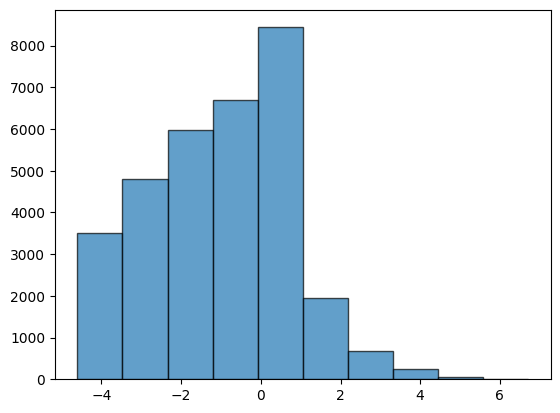

In [131]:
ads_dim_scaled["log_ad_revenue"] = np.log(ads_dim_scaled["ad_rev_per_day"] + 0.01)

plt.hist(ads_dim_scaled["log_ad_revenue"],  edgecolor='black', alpha=0.7)

print(ads_dim_scaled["log_ad_revenue"].max(), ads_dim_scaled["log_ad_revenue"].min())

7.584518250557074

 -4.605170185988091


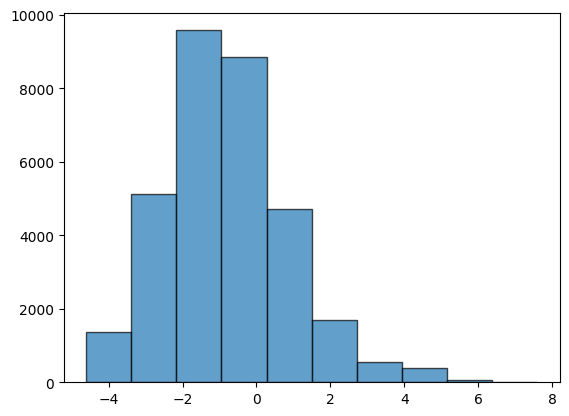

In [132]:
ads_dim_scaled["log_avg_ad_revenue"] = np.log(ads_dim_scaled["avg_ad_revenue"] + 0.01)

plt.hist(ads_dim_scaled["log_avg_ad_revenue"],  edgecolor='black', alpha=0.7)

print(ads_dim_scaled["log_avg_ad_revenue"].max(), ads_dim_scaled["log_avg_ad_revenue"].min())

(array([0.000e+00, 1.970e+02, 6.620e+02, 4.050e+02, 9.760e+03, 9.408e+03,
        4.110e+02, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <BarContainer object of 10 artists>)

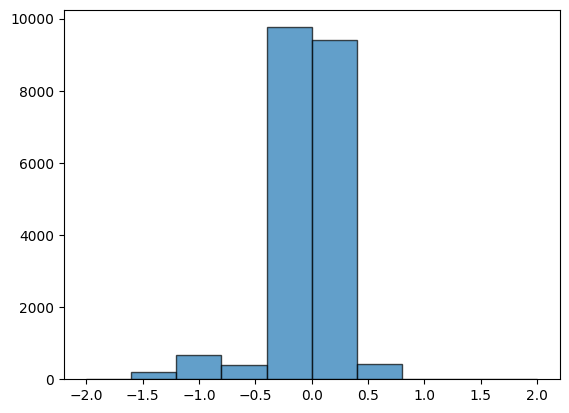

In [133]:
ads_dim_scaled["log_baseline_st"] = np.log(ads_dim_scaled["baseline_st"] + 0.01)

plt.hist(ads_dim_scaled["log_baseline_st"],  edgecolor='black', alpha=0.7, range=(-2,2))

In [134]:
ads_dim_scaled.head()

,ad_id,delivery_country,avg_ad_revenue,baseline_st,product_line,task_type_en,punish_category,days_since_punish,ad_rev_per_day,log_ad_revenue,log_avg_ad_revenue,log_baseline_st
0,1747578422390810,US,550.298948,1.000000,Auction Ads,auction_relation,Medium,14,1.365904,0.319111,6.310480,0.009950
1,1758543228094480,SA,122.077026,0.911290,RIE,Ad Group Recall (Merged),Medium,54,0.908736,-0.084756,4.804734,-0.081980
2,1738303151826990,AU,0.615683,1.048387,Auction Ads,auction_relation,Medium,14,0.000341,-4.571682,-0.468911,0.056746
3,1738303920938010,NZ,0.615683,0.838710,Auction Ads,auction_relation,Medium,14,1.922536,0.658833,-0.468911,-0.164038
4,1738304016410620,NZ,0.615683,0.838710,Auction Ads,auction_relation,Medium,14,0.000299,-4.575684,-0.468911,-0.164038


### EDA for Cleaned Data 

### Histogram for Non-Log Variables 

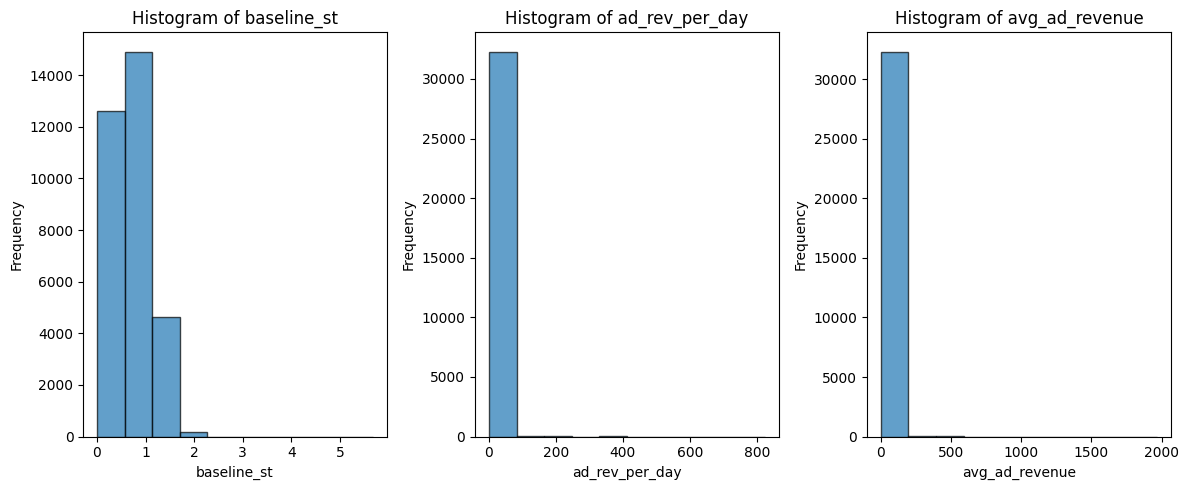

In [135]:
plt.figure(figsize=(12, 5))
numerical_columns = ['baseline_st' ,'ad_rev_per_day', 'avg_ad_revenue']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(ads_dim_scaled[column_name], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Histogram for Log Variables 

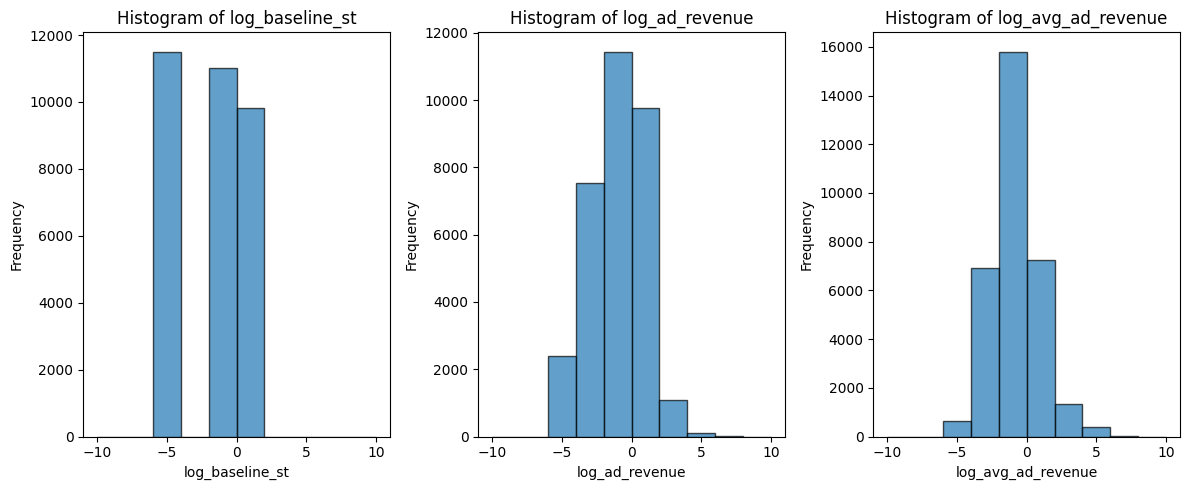

In [136]:
plt.figure(figsize=(12, 5))
numerical_columns = [ 'log_baseline_st' ,'log_ad_revenue', 'log_avg_ad_revenue']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(ads_dim_scaled[column_name], bins=10, edgecolor='black', alpha=0.7, range=(-10,10))
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Correlation Matrix 

C:\Users\fongj\AppData\Local\Temp\ipykernel_9376\1365062871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ads_dim_scaled.corr()


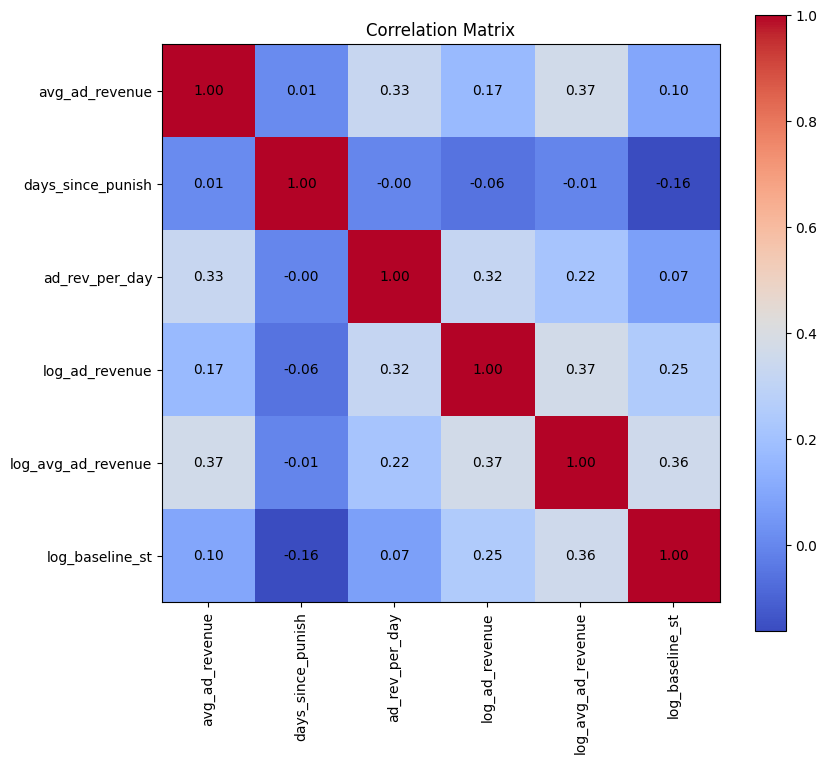

In [137]:
correlation_matrix = ads_dim_scaled.corr()

# Remove columns "ad_id" and "baseline_st" from the correlation matrix
correlation_matrix = correlation_matrix.drop(['ad_id', 'baseline_st'], axis=1)
correlation_matrix = correlation_matrix.drop(['ad_id', 'baseline_st'], axis=0)

fig, ax = plt.subplots(figsize=(9, 8))
im = ax.imshow(correlation_matrix, cmap='coolwarm')
cbar = plt.colorbar(im)

tick_marks = np.arange(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=90)
plt.yticks(tick_marks, correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"  # Format to two decimal places
        ax.text(j, i, text, ha='center', va='center', color='black', fontsize=10)

plt.title('Correlation Matrix')
plt.show()

### Categorical variables

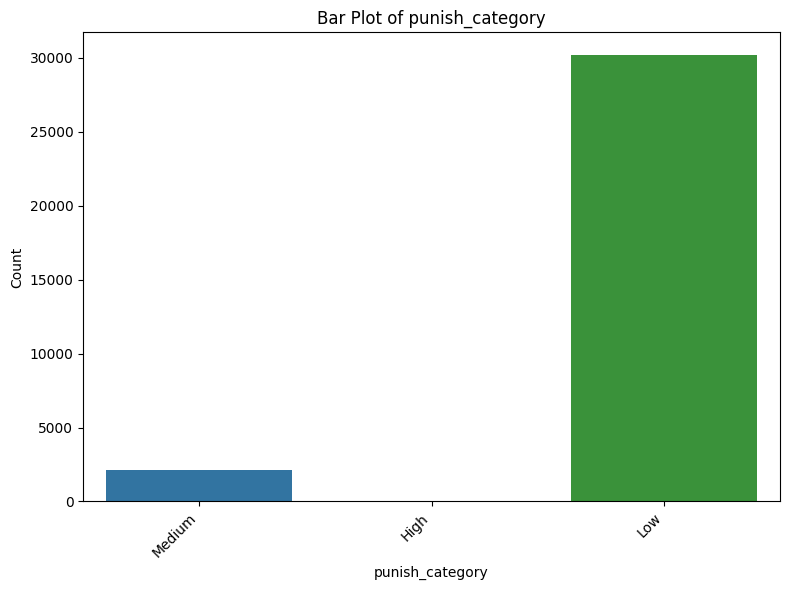

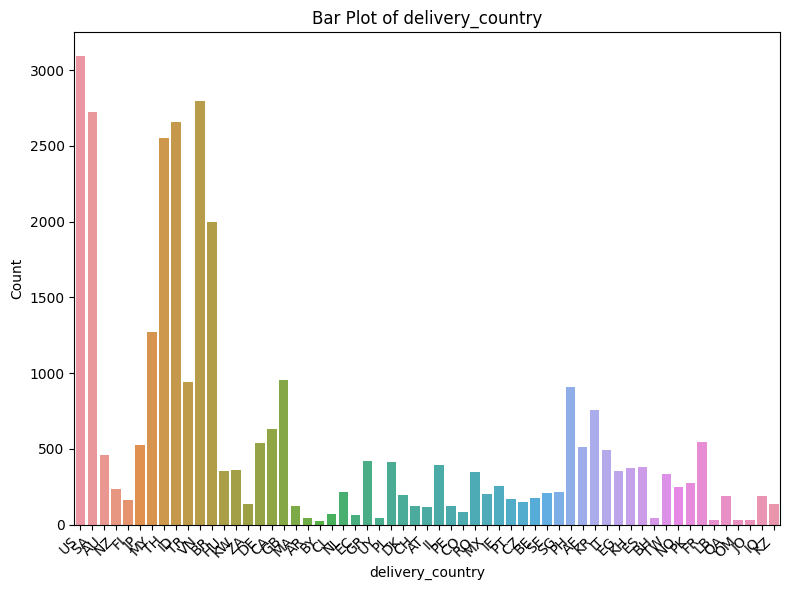

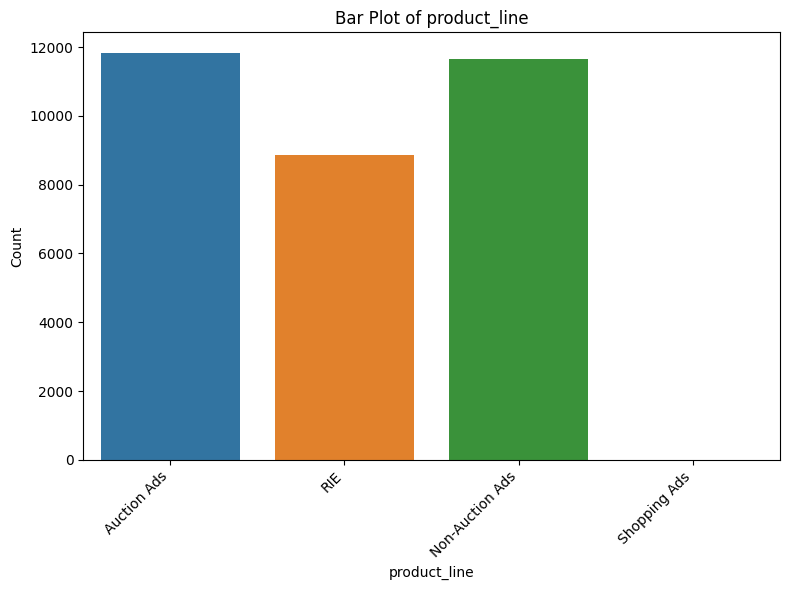

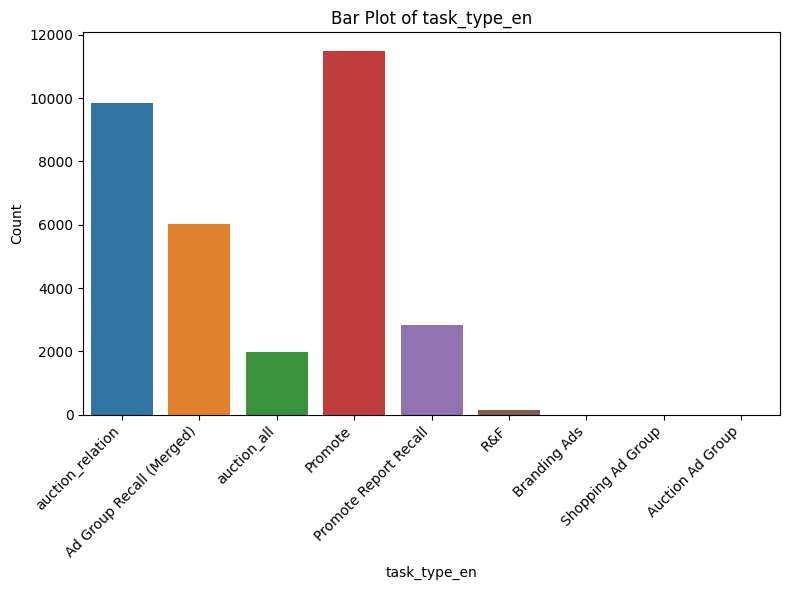

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['punish_category', 'delivery_country', 'product_line', 'task_type_en']

for column in cat_cols:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=ads_dim_scaled, x=column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout() 
    plt.show()

### One Hot Encoding For Categorical Variables 

#### For categorical variables, we will one hot encode punish_category so that it can be used for machine learning models since ML models require input variables 

In [139]:
categorical_columns = ["punish_category"]

encoded_df = pd.get_dummies(ads_dim_scaled, columns=categorical_columns)

ads_dim_scaled = encoded_df

ads_dim_scaled.head()

,ad_id,delivery_country,avg_ad_revenue,baseline_st,product_line,task_type_en,days_since_punish,ad_rev_per_day,log_ad_revenue,log_avg_ad_revenue,log_baseline_st,punish_category_High,punish_category_Low,punish_category_Medium
0,1747578422390810,US,550.298948,1.000000,Auction Ads,auction_relation,14,1.365904,0.319111,6.310480,0.009950,0,0,1
1,1758543228094480,SA,122.077026,0.911290,RIE,Ad Group Recall (Merged),54,0.908736,-0.084756,4.804734,-0.081980,0,0,1
2,1738303151826990,AU,0.615683,1.048387,Auction Ads,auction_relation,14,0.000341,-4.571682,-0.468911,0.056746,0,0,1
3,1738303920938010,NZ,0.615683,0.838710,Auction Ads,auction_relation,14,1.922536,0.658833,-0.468911,-0.164038,0,0,1
4,1738304016410620,NZ,0.615683,0.838710,Auction Ads,auction_relation,14,0.000299,-4.575684,-0.468911,-0.164038,0,0,1


In [140]:
## output file 
## ads_dim3.to_excel('ads_dim3.xlsx', index=False)


## Moderator Dimension

In [141]:
print(mod_dim.shape)
# Check for duplicate rows in mod_dim 
mod_duplicates = mod_dim.duplicated().sum()
print(mod_duplicates)

(1414, 6)
0


In [142]:
# find number of null values in each column
for col in mod_dim.columns:
    if mod_dim[col].isna().sum() > 0:
        print(f' "{col}" : {mod_dim[col].isna().sum()}')
    else:
        continue
mod_dim.rename(columns={' accuracy ': 'accuracy'}, inplace=True)
# accuracy column contains "-" values
non_numeric_values = mod_dim[pd.to_numeric(mod_dim["accuracy"], errors='coerce').isna()]
len(non_numeric_values)

print(non_numeric_values)

 "Productivity" : 129
 "Utilisation %" : 129
             moderator                                             market  \
0     1689841547143170  ["SA", "OM", "BH", "QA", "JO", "IQ", "KW", "EG...   
265   1694555598292994                                             ["NL"]   
412   1761892264652818                                             ["DE"]   
510            1005827                                             ["BR"]   
529            2796851                                             ["KZ"]   
892            3778633                                             ["TR"]   
916            5581253                                             ["DK"]   
943            9699751                                             ["ID"]   
1283           1822136                                       ["GB", "IE"]   
1331           3297271                                          ["OTHER"]   
1393  1695027913818113                                             ["IT"]   

      Productivity  Utilisatio

In [143]:
# remove rows that have null values for productivity and utilisation, and "-" values for accuracy
column_name = 'accuracy'
numeric_mask = pd.to_numeric(mod_dim[column_name], errors='coerce').notna()
cleaned_mod_dim = mod_dim[numeric_mask]

print(len(cleaned_mod_dim))

columns_to_check = ['Productivity', 'Utilisation %']

cleaned_mod_dim = cleaned_mod_dim.dropna(subset=columns_to_check, how='all')

print(len(cleaned_mod_dim))

1403
1275


### Exploratory Data Analysis of Moderator Dimension

In [144]:
print(cleaned_mod_dim.describe())

print(cleaned_mod_dim.isnull().sum())

print(cleaned_mod_dim.dtypes)

          moderator  Productivity  Utilisation %  handling time
count  1.275000e+03   1275.000000    1275.000000   1.275000e+03
mean   1.084096e+15    368.445545       0.725055   1.068949e+05
std    8.345996e+14    177.840831       0.195460   3.747668e+05
min    1.003316e+06      0.540000       0.000000   7.300000e+01
25%    7.064704e+06    249.239693       0.658732   6.276050e+04
50%    1.695291e+15    344.712500       0.779906   8.586800e+04
75%    1.736353e+15    462.375000       0.849611   1.016235e+05
max    1.774284e+15   1323.355000       1.287250   9.443621e+06
moderator        0
market           0
Productivity     0
Utilisation %    0
handling time    0
accuracy         0
dtype: int64
moderator          int64
market            object
Productivity     float64
Utilisation %    float64
handling time      int64
accuracy          object
dtype: object


### Data visualisation

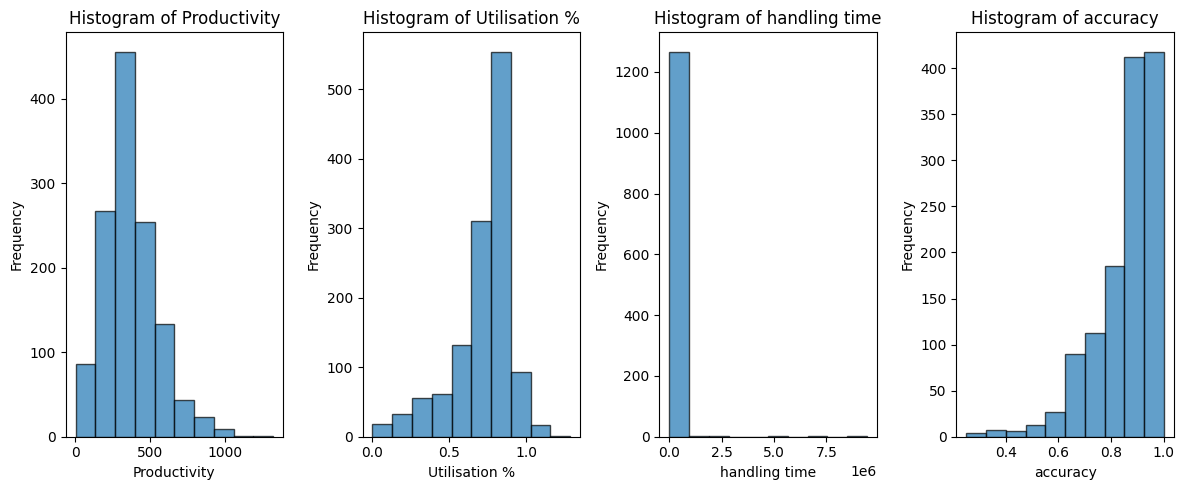

In [145]:
plt.figure(figsize=(12, 5))
numerical_columns = [ 'Productivity','Utilisation %' ,'handling time', 'accuracy']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(cleaned_mod_dim[column_name], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


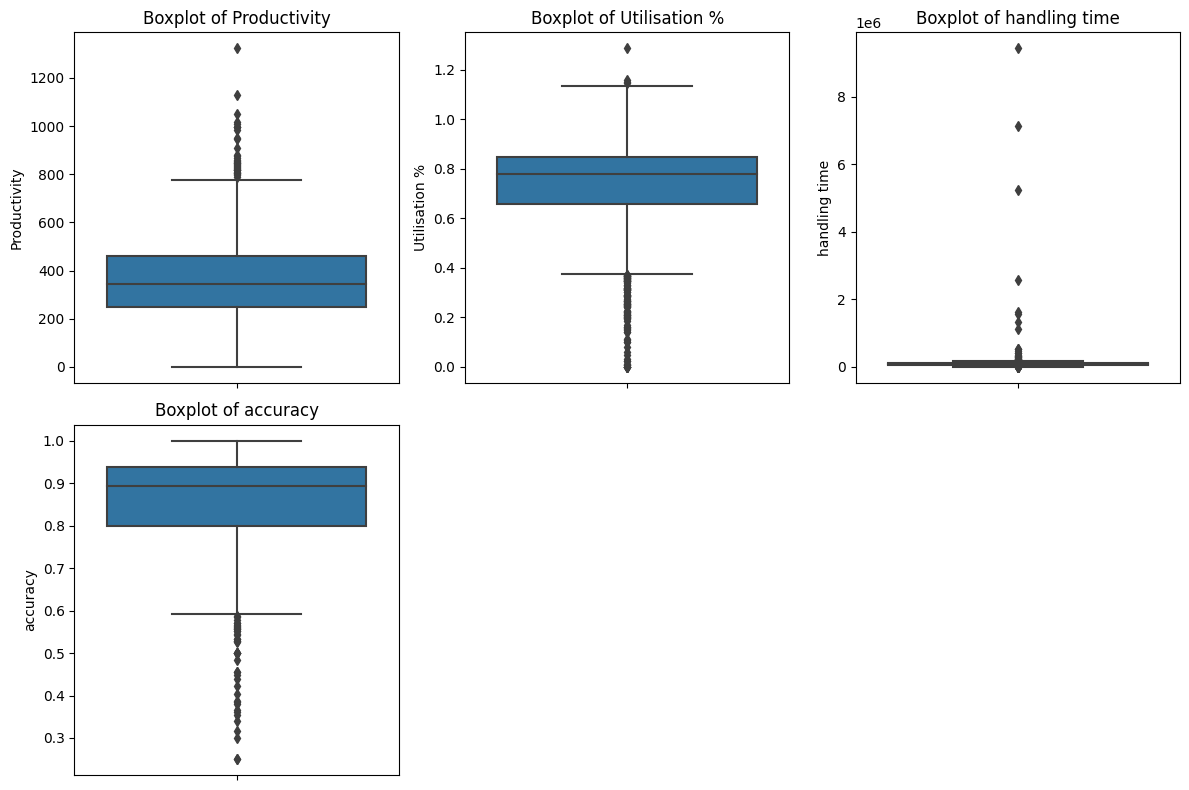

In [146]:
# Select numerical columns
numerical_columns = [ 'Productivity','Utilisation %' ,'handling time', 'accuracy']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=cleaned_mod_dim, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#### From the boxplot, we can see again that all numerical variables have outliers. Similarly, we perform robust scaling 

In [147]:
variables = [ 'Productivity','Utilisation %' ,'handling time', 'accuracy']

mod_dim_scaled = cleaned_mod_dim.copy()
subset = cleaned_mod_dim[variables]

scaled_data = scaler.fit_transform(subset)
mod_dim_scaled[variables] = scaled_data

In [148]:
mod_dim_scaled.describe()

,moderator,Productivity,Utilisation %,handling time,accuracy
count,1.275000e+03,1275.000000,1275.000000,1275.000000,1275.000000
mean,1.084096e+15,0.111352,-0.287360,0.541051,-0.276213
std,8.345996e+14,0.834403,1.023999,9.643279,0.853456
min,1.003316e+06,-1.614808,-4.085860,-2.207627,-4.616487
25%,7.064704e+06,-0.447945,-0.634822,-0.594589,-0.677419
50%,1.695291e+15,0.000000,0.000000,0.000000,0.000000
75%,1.736353e+15,0.552055,0.365178,0.405411,0.322581
max,1.774284e+15,4.591649,2.657929,240.788230,0.759857


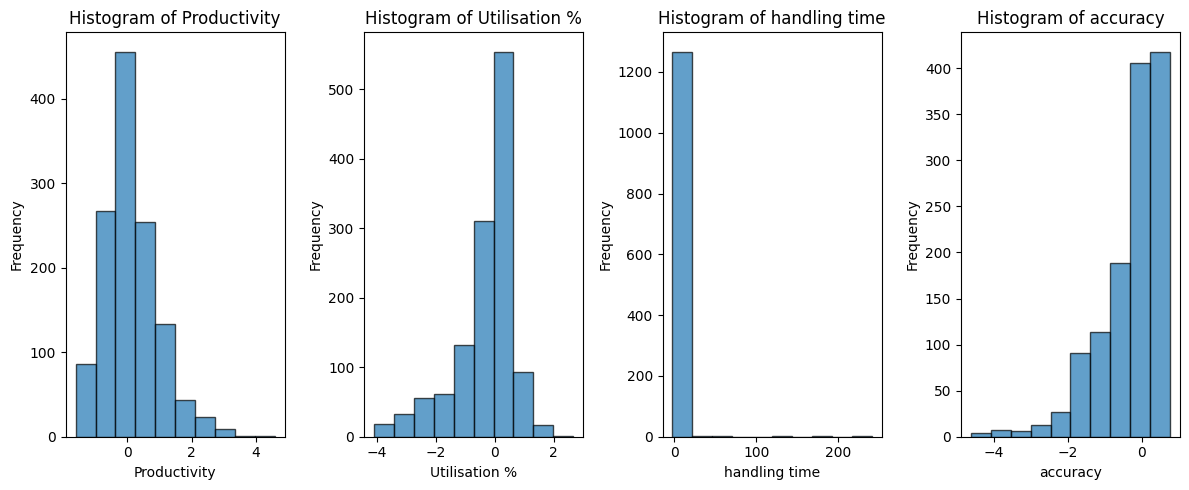

In [149]:

plt.figure(figsize=(12, 5))
numerical_columns = [ 'Productivity','Utilisation %' ,'handling time', 'accuracy']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(mod_dim_scaled[column_name], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [150]:
columns = [ 'Productivity','Utilisation %' ,'handling time', 'accuracy']

for column in columns:
    mod_dim_scaled[column] += abs(mod_dim_scaled[column].min())

mod_dim_scaled.describe()

,moderator,Productivity,Utilisation %,handling time,accuracy
count,1.275000e+03,1275.000000,1275.000000,1275.000000,1275.000000
mean,1.084096e+15,1.726160,3.798500,2.748678,4.340274
std,8.345996e+14,0.834403,1.023999,9.643279,0.853456
min,1.003316e+06,0.000000,0.000000,0.000000,0.000000
25%,7.064704e+06,1.166863,3.451038,1.613038,3.939068
50%,1.695291e+15,1.614808,4.085860,2.207627,4.616487
75%,1.736353e+15,2.166863,4.451038,2.613038,4.939068
max,1.774284e+15,6.206456,6.743789,242.995857,5.376344


### Correlation matrix

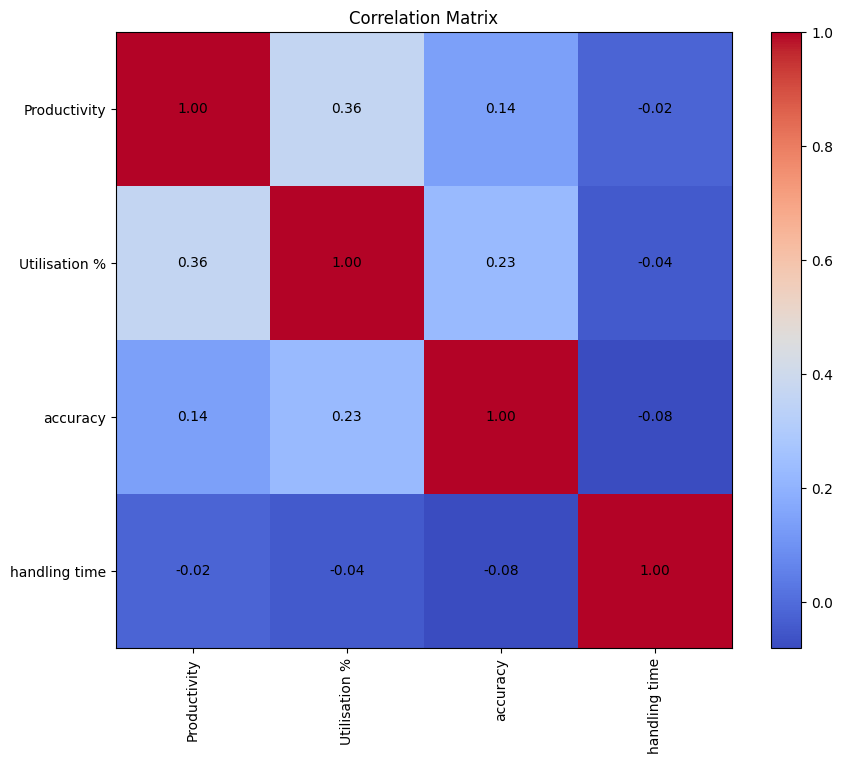

In [151]:
selected_columns = ["Productivity", "Utilisation %", "accuracy", "handling time"]
selected_data = mod_dim_scaled[selected_columns]
correlation_matrix = selected_data.corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='coolwarm')
cbar = plt.colorbar(im)
tick_marks = np.arange(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=90)
plt.yticks(tick_marks, correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}" 
        ax.text(j, i, text, ha='center', va='center', color='black', fontsize=10)

plt.title('Correlation Matrix')
plt.show()


### All correlation coefficients are small, so multicollinearity will not be an issue when creating models

## Categorical variables

#### We one-hot encode the categorical variable "market" so it can be useful as a variable in our models

In [152]:
mod_dim_scaled['market'] = mod_dim_scaled['market'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
market_encoded = pd.DataFrame(mlb.fit_transform(mod_dim_scaled['market']), columns=mlb.classes_)

mod_dim_scaled = pd.concat([mod_dim_scaled, market_encoded], axis=1)

mod_dim_scaled.drop(columns=['market'], inplace=True)

In [153]:
mod_dim_scaled.head()

,moderator,Productivity,Utilisation %,handling time,accuracy,"""AE""","""AR""","""AT""","""AU""","""BE""",...,"""TH""","""TN""","""TR""","""TW""","""UA""","""US""","""UY""","""UZ""","""VN""","""ZA"""
1,1.686755e+15,0.816477,3.692560,0.655482,5.082437,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.741913e+15,1.566310,4.291542,1.305123,5.376344,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.743415e+15,2.119487,4.062640,2.304325,4.953405,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.710346e+15,2.870348,4.417603,2.521499,4.566308,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.748544e+15,1.369036,3.556048,2.073515,3.505376,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [154]:
## output file 
## mod_dim_scaled.to_excel('mod_dim.xlsx', index=False)